# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing four stocks. The *first portfolio* will have an *equal weighting between the stocks*. The *second portfolio* will be optimized with a *weighting allocation* that provides the best return, adjusted for risk. To build these two portfolios, we will:

1. Import two years of data for six stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equally weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results



## Import Packages & Connect to Data

In [40]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# pd.set_option('mode.chained_assignment', None)

In [41]:
# We fetch our data from yahoo finance
import yfinance as yf

In [42]:
# Creating a list for the six stock ticker symbols of 
# Advanced Micro Devices Inc, Apple Inc, Microsoft, Oracle, Google, and Tesla
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA']

# Create dictionary to store stock data
stocks = {}

# Download 2 years of daily data for each stock
for ticker in stock_list:
    stocks[ticker] = yf.download(ticker, period="2y", auto_adjust=False)

    # stocks[ticker] = stocks[ticker].reset_index()
    if 'Adj Close' not in stocks[ticker].columns:
        stocks[ticker].rename(columns={'Close': 'Adj Close'}, inplace=True)
    #stocks[ticker] = data
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
# Examine the 'AMD' Adj Close from the stocks dictionary to confirm the data fetch correctly
stocks['AMD']

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMD,AMD,AMD,AMD,AMD,AMD
Date,,,,,,
2023-10-03,100.080002,100.080002,103.290001,99.169998,101.800003,48117000
2023-10-04,104.070000,104.070000,104.400002,100.339996,100.650002,51023200
2023-10-05,102.910004,102.910004,103.739998,100.269997,103.410004,51789700
2023-10-06,107.239998,107.239998,107.870003,102.029999,102.160004,64864100
2023-10-09,106.970001,106.970001,107.309998,104.790001,106.010002,39593200
...,...,...,...,...,...,...
2025-09-29,161.360001,161.360001,164.300003,159.899994,160.119995,39828800
2025-09-30,161.789993,161.789993,162.279999,159.330002,160.789993,29669300


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = *i*th Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [44]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [45]:
stocks['AAPL'].head()

Price,Adj Close,Close,High,Low,Open,Volume,Normalized Return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2023-10-03,170.727737,172.399994,173.630005,170.820007,172.259995,49594600,1.000000
2023-10-04,171.975494,173.660004,174.210007,170.970001,171.089996,53020300,1.007308
2023-10-05,173.213379,174.910004,175.449997,172.679993,173.789993,48527900,1.014559
2023-10-06,175.768372,177.490005,177.990005,173.179993,173.800003,57266700,1.029524
2023-10-09,177.253830,178.990005,179.050003,175.800003,176.809998,42390800,1.038225


In [46]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    allocation = 1 / len(stock_list)
    stock_data['Allocation'] = stock_data['Normalized Return'] * allocation

In [47]:
stocks['MSFT'].head()

Price,Adj Close,Close,High,Low,Open,Volume,Normalized Return,Allocation
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,,
Date,,,,,,,,
2023-10-03,308.737366,313.390015,321.390015,311.209991,320.829987,21033500,1.000000,0.166667
2023-10-04,314.224640,318.959991,320.040009,314.000000,314.029999,20720100,1.017773,0.169629
2023-10-05,314.618713,319.359985,319.980011,314.899994,319.089996,16965600,1.019050,0.169842
2023-10-06,322.401459,327.260010,329.190002,316.299988,316.549988,25673600,1.044258,0.174043
2023-10-09,324.923431,329.820007,330.299988,323.179993,324.750000,19891200,1.052427,0.175404


In [48]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [49]:
stocks['AMD'].head()

Price,Adj Close,Close,High,Low,Open,Volume,Normalized Return,Allocation,Position Value
Ticker,AMD,AMD,AMD,AMD,AMD,AMD,,,
Date,,,,,,,,,
2023-10-03,100.080002,100.080002,103.290001,99.169998,101.800003,48117000,1.000000,0.166667,1666.666667
2023-10-04,104.070000,104.070000,104.400002,100.339996,100.650002,51023200,1.039868,0.173311,1733.113472
2023-10-05,102.910004,102.910004,103.739998,100.269997,103.410004,51789700,1.028277,0.171380,1713.795660
2023-10-06,107.239998,107.239998,107.870003,102.029999,102.160004,64864100,1.071543,0.178590,1785.904541
2023-10-09,106.970001,106.970001,107.309998,104.790001,106.010002,39593200,1.068845,0.178141,1781.408195


## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [50]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [51]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,AMD,AAPL,MSFT,ORCL,GOOGL,TSLA
Date,,,,,,
2023-10-03,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667
2023-10-04,1733.113472,1678.847434,1696.288792,1707.488234,1702.031510,1765.572851
2023-10-05,1713.795660,1690.931826,1698.416131,1727.739332,1699.891977,1758.068586
2023-10-06,1785.904541,1715.874001,1740.429971,1753.412420,1731.480685,1761.313701
2023-10-09,1781.408195,1730.375242,1754.044416,1759.152788,1742.052665,1755.499768


In [52]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [53]:
position_values

,AMD,AAPL,MSFT,ORCL,GOOGL,TSLA,Total
Date,,,,,,,
2023-10-03,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667,10000.000000
2023-10-04,1733.113472,1678.847434,1696.288792,1707.488234,1702.031510,1765.572851,10283.342294
2023-10-05,1713.795660,1690.931826,1698.416131,1727.739332,1699.891977,1758.068586,10288.843512
2023-10-06,1785.904541,1715.874001,1740.429971,1753.412420,1731.480685,1761.313701,10488.415321
2023-10-09,1781.408195,1730.375242,1754.044416,1759.152788,1742.052665,1755.499768,10522.533073
...,...,...,...,...,...,...,...
2025-09-29,2687.183547,2483.779110,2777.981292,4618.252542,3092.618007,2996.322244,18656.136742
2025-09-30,2694.344363,2485.731656,2796.065900,4593.426421,3080.579582,3006.530668,18656.678591
2025-10-01,2731.314807,2493.736527,2805.567016,4720.332318,3103.389148,3106.180409,18960.520223


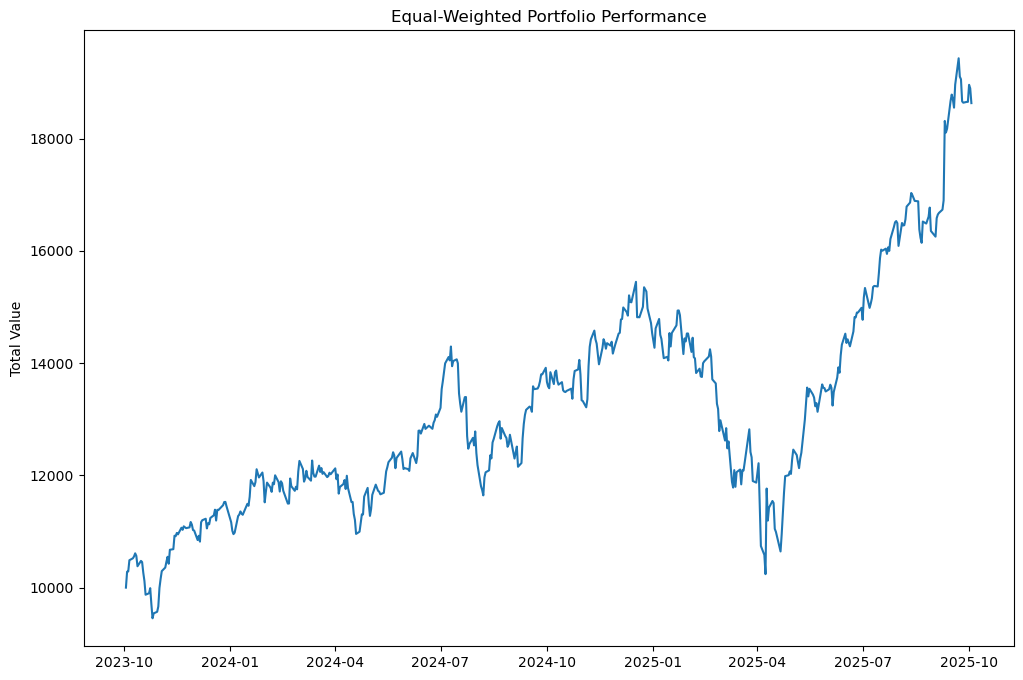

In [54]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value')
plt.show()

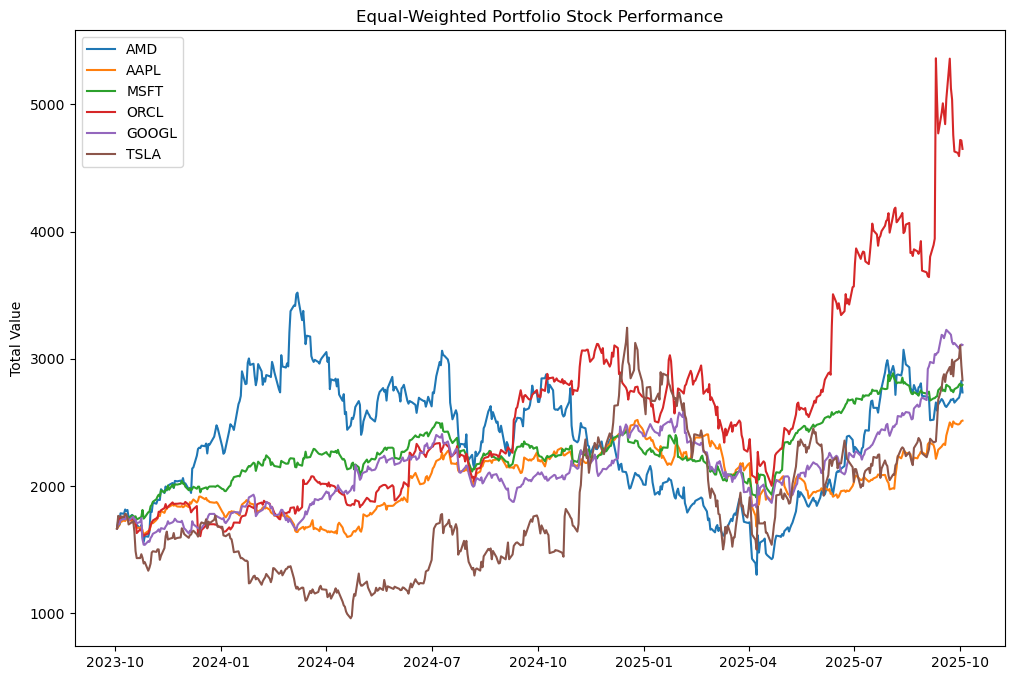

In [55]:
# View the four stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:6])
plt.legend(position_values,loc="upper left", fontsize=10, frameon=True)

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.show();

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [56]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

In [57]:
# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print('The cummulative return is', str(round(cumulative_return*100,2)), '%')

The cummulative return is 86.34 %


In [58]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change().infer_objects(copy=False)

position_values.head()

,AMD,AAPL,MSFT,ORCL,GOOGL,TSLA,Total,Daily Return
Date,,,,,,,,
2023-10-03,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667,1666.666667,10000.000000,NaN
2023-10-04,1733.113472,1678.847434,1696.288792,1707.488234,1702.031510,1765.572851,10283.342294,0.028334
2023-10-05,1713.795660,1690.931826,1698.416131,1727.739332,1699.891977,1758.068586,10288.843512,0.000535
2023-10-06,1785.904541,1715.874001,1740.429971,1753.412420,1731.480685,1761.313701,10488.415321,0.019397
2023-10-09,1781.408195,1730.375242,1754.044416,1759.152788,1742.052665,1755.499768,10522.533073,0.003253


In [59]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0014


In [60]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0177


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk-free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [61]:
# Calculate the sharpe ratio
# 5% annual ≈ 0.000198 daily considering only 252 business days
risk_free_rate = 0.05 / 252   
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_daily_return

print(sharpe_ratio)

0.06750593250100026


In [62]:
# zero risk free rate
sharpe_ratio_zrf = mean_daily_return / std_daily_return
print(sharpe_ratio_zrf)

0.0786897458412495


In [63]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252 ** 0.5

print(sharpe_ratio_annualized)

1.0716234565149552


## 📈 Portfolio Performance Summary (Equal-Weighted Tech Stocks)

1. Equal-Weighted Portfolio

This first portfolio was constructed by allocating an equal share of the investment to each stock. Key steps included:
	•	Normalizing adjusted closing prices to track growth from a common starting point.
	•	Allocating weights equally across the six stocks (≈16.7% each).
	•	Computing portfolio position values and total value over time.

This provided a baseline for comparison, illustrating how an equally diversified portfolio evolves without optimization.

2. Performance Evaluation

The equal-weighted portfolio was evaluated using standard performance metrics:
	•	Cumulative Return: Overall portfolio growth relative to the starting value.
	•	Mean Daily Return: Average return per day.
	•	Volatility: Standard deviation of daily returns, representing risk.
	•	Sharpe Ratio: Risk-adjusted return, annualized by multiplying by √252.

In [64]:
print('Key Metrics: \n',
      'The cummulative return is', str(round(cumulative_return*100,2)),'% \n',
      'The mean daily return is:', str(round(mean_daily_return, 4)), '\n',
        'The std daily return is:', str(round(std_daily_return, 4)), '\n',
        'The sharpe rato is:', str(round(sharpe_ratio, 4)), '\n',
        'Using zero risk free rate, the sharpe rato is:', str(round(sharpe_ratio_zrf, 4)), '\n',
        'The annualized sharpe rato is:', str(round(sharpe_ratio_annualized, 4)), '\n')

Key Metrics: 
 The cummulative return is 86.34 % 
 The mean daily return is: 0.0014 
 The std daily return is: 0.0177 
 The sharpe rato is: 0.0675 
 Using zero risk free rate, the sharpe rato is: 0.0787 
 The annualized sharpe rato is: 1.0716 



These metrics quantify both profitability and risk exposure.

### Risk & Exposure

This analysis evaluates an equal-weighted investment strategy using historical data from six major technology companies: **AMD, Apple, Microsoft, Oracle, Google, and Tesla**.

### 🔹 Key Metrics

- **Cumulative Return**: indicates the *portfolio growth over the investment period*.

- **Mean Daily Return**: indicates the *average daily gain* showing consistent growth.

- **Standard Deviation (Daily)**: Reflects relatively high *volatility* typical of tech stocks.

- **Sharpe Ratio (Raw)**: is the *risk-adjusted return*, assuming a non-zero risk-free rate. The Sharpe ratio tells you how much return you get per unit of risk. A low value suggests a modest return compared to the risk.

- **Sharpe Ratio (Zero Risk-Free Rate)**: is the *risk-adjusted return*, assuming a zero risk-free rate. Same idea as above, but assuming zero risk-free rate. Still similar performance.

- **Annualized Sharpe Ratio**: Indicates the **risk-adjusted return** (Sharpe > 1 is generally considered acceptable).

### 🧠 Interpretation

- The portfolio delivered **strong absolute returns** with **moderate-to-high volatility**.
- The **Sharpe ratio suggests decent compensation for risk**, making this equal-weighted approach a solid baseline.
- There's potential to improve results through more advanced portfolio optimization strategies

✅ This equal-weighted tech portfolio serves as a **good benchmark** for comparing more sophisticated strategies.

## Optimizing Portfolio Weighting using Monte Carlo Simulation
To identify an optimal allocation, we employed Monte Carlo simulation within the framework of Modern Portfolio Theory (MPT):
	•	Monte Carlo Simulation: 10,000 random portfolios are generated by assigning random weight combinations to the six stocks.
	•	For each simulated portfolio, expected annual return, volatility, and Sharpe ratio were computed.
	•	The process approximates the efficient frontier, that is, the set of portfolios that offer the highest return for a given level of risk.
	•	The portfolio with the maximum Sharpe ratio is the optimal allocation, representing the best risk-return trade-off.

### Preparing Scenarios
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [65]:
# Create stock_adj_close dictionary
stock_adj_close = {}

stock_adj_close = pd.concat(
    {ticker: data['Adj Close'] for ticker, data in stocks.items()},
    axis=1)

In [66]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.columns = stock_adj_close.columns.droplevel(1)

# Ensure index is Date and sorted
stock_adj_close

,AMD,AAPL,MSFT,ORCL,GOOGL,TSLA
Date,,,,,,
2023-10-03,100.080002,170.727737,308.737366,102.044373,131.522873,246.529999
2023-10-04,104.070000,171.975494,314.224640,104.543739,134.313644,261.160004
2023-10-05,102.910004,173.213379,314.618713,105.783646,134.144806,260.049988
2023-10-06,107.239998,175.768372,322.401459,107.355522,136.637589,260.529999
2023-10-09,106.970001,177.253830,324.923431,107.706985,137.471863,259.670013
...,...,...,...,...,...,...
2025-09-29,161.360001,254.429993,514.599976,282.760010,244.050003,443.209991
2025-09-30,161.789993,254.630005,517.950012,281.239990,243.100006,444.720001
2025-10-01,164.009995,255.449997,519.710022,289.010010,244.899994,459.459991


In [67]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

,AMD,AAPL,MSFT,ORCL,GOOGL,TSLA
Date,,,,,,
2023-10-03,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-04,0.039868,0.007308,0.017773,0.024493,0.021219,0.059344
2023-10-05,-0.011146,0.007198,0.001254,0.011860,-0.001257,-0.004250
2023-10-06,0.042076,0.014751,0.024737,0.014859,0.018583,0.001846
2023-10-09,-0.002518,0.008451,0.007822,0.003274,0.006106,-0.003301


## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [68]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [69]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [70]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(len(stock_returns.columns)))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index] if volatility_array[index] != 0 else 0

In [71]:
print("The first combination:", weights_array[0])

The first combination: [0.14306743 0.18393841 0.07556128 0.13268532 0.23193921 0.23280835]


In [72]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.3092623450326424


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [73]:
# Find the highest sharpe ratio in sharpe_array
print(sharpe_array.max())

1.6300173595234653


In [74]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
print(index_max_sharpe)

4480


In [75]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA']
[0.02065346 0.05909883 0.38745428 0.29498087 0.23192123 0.00589133]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios. 

### 📊 Portfolio Weight Allocation (Pie Chart)

The chart below shows the proportion of capital allocated to each stock in the Monte Carlo optimized portfolio.

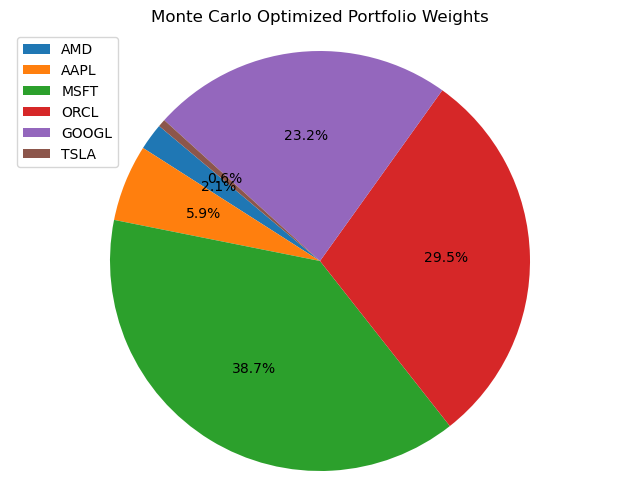

In [76]:
optimal_weights = weights_array[index_max_sharpe, :]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(optimal_weights, autopct='%1.1f%%', startangle=140)
plt.legend(labels=stock_list, loc="upper left", fontsize=10)
plt.title('Monte Carlo Optimized Portfolio Weights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Portfolio Visualization (scatter chart)
We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

In [77]:
##  Identify the optimal portfolio in the returns and volatility arrays
# max_sharpe_return = returns_array[index_max_sharpe]
# max_sharpe_volatility = volatility_array[index_max_sharpe]

##  Visualize volatility vs returns for each scenario
# plt.figure(figsize=(12,8))

# plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

# plt.colorbar(label='Sharpe Ratio')
# plt.xlabel('Volatility')
# plt.ylabel('Return')

##  Add the optimal portfolio to the visual
# plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black')
# plt.show()

In [78]:
import plotly.express as px
fig = px.scatter(
    x=volatility_array, y=returns_array,
    color=sharpe_array, color_continuous_scale='Viridis',
    labels={'x': 'Volatility (Risk)', 'y': 'Expected Return'},
    title="Portfolio Risk vs Return")
fig.add_scatter(x=[max_sharpe_volatility], y=[max_sharpe_return],
                mode='markers', marker=dict(color='red', size=12),
                name='Max Sharpe')
# increase plot size
fig.update_layout(width=1000, height=700)  # adjust size here

fig.show()

NameError: name 'max_sharpe_volatility' is not defined

## Monte Carlo Optimized Portfolio Results

A Monte Carlo simulation was used to optimize a portfolio consisting of six major technology stocks:

**Stocks**: `AMD`, `AAPL`, `MSFT`, `ORCL`, `GOOGL`, `TSLA`

### Optimal Portfolio Weights
See the pie chart above.

### Performance Metric

- **Sharpe Ratio (Optimized)**:

The optimized Sharpe ratio indicates a **strong risk-adjusted return**, significantly higher than the equal-weighted portfolio benchmark. The optimization notably **reduces exposure to higher-volatility stocks** (e.g., AMD, TSLA) while emphasizing stable performers (MSFT, ORCL, GOOGL).

✅ **Conclusion**:  
The Monte Carlo optimized portfolio delivers superior performance with a **better risk-return trade-off** compared to a simple equal-weighted strategy.